In [310]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

In [311]:
# Specify the path to the folder containing .dta files
path = 'nsch_data/'  # Replace with the actual folder path

# Use glob to get all the .dta file paths in the folder
all_files = glob.glob(path + "*.dta")

# Initialize an empty list to store DataFrames
dfs = []

# Loop over the list of .dta files and read them into DataFrames
for filename in all_files:
    df_aux = pd.read_stata(filename)
    dfs.append(df_aux)

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
df.head()


,fipsst,hhid,formtype,totkids_r,hhlanguage,sc_age_years,sc_sex,k2q35a_1_years,momage,k6q41r_still,...,grades,homeevic,inq_resseg,inq_edu,inq_employ,inq_income,inq_home,mold,pesticide,a2_if
0,18,16000030,T1,1,1.0,2,1,NaN,28.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,16000032,T2,1,1.0,9,1,6.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50,16000050,T2,1,1.0,11,1,NaN,28.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,16000051,T2,3,1.0,10,2,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53,16000090,T3,1,1.0,15,2,NaN,30.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
# Display the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279546 entries, 0 to 279545
Columns: 551 entries, fipsst to a2_if
dtypes: float64(515), int16(7), int32(1), int8(21), object(7)
memory usage: 1.1+ GB


In [313]:
# Get unique values in the target column
unique_values = df['k2q31a'].unique()

# Display the unique values
print(unique_values)

[ 2.  1. nan]


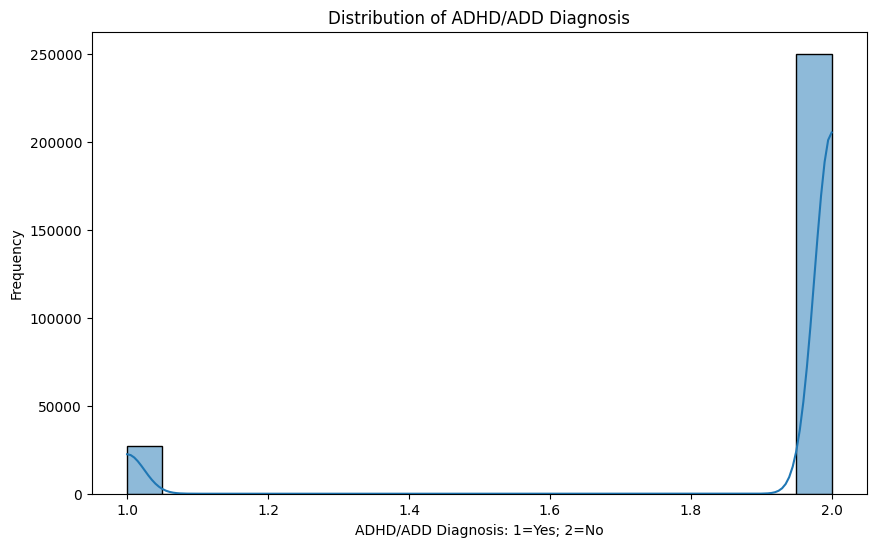

In [314]:
plt.figure(figsize=(10, 6))
sns.histplot(df['k2q31a'], kde=True)
plt.title('Distribution of ADHD/ADD Diagnosis')
plt.xlabel('ADHD/ADD Diagnosis: 0=Yes; 1=No')
plt.ylabel('Frequency')
plt.show()

In [315]:
null_values_count = df['k2q31a'].isnull().sum()
print(null_values_count)

1881


In [316]:
df = df.rename(columns={'k2q31a':'y'})

In [317]:
df = df.dropna(subset=['y'])

In [318]:
columns_to_remove = ['a1_active',
'a1_deplstat',
'a1_employed',
'a2_active',
'a2_deplstat',
'a2_employed',
'ace11',
'ace12',
'askquestion',
'askquestion2',
'autoimmune',
'autoimmune_desc',
'birth_mo',
'birth_yr',
'birth_yr_f',
'blood_screen',
'bmiclass',
'bodyimage',
'bounceaball',
'concussion',
'confirminjury',
'covidarrange',
'covidcheckups',
'cystfib_screen',
'directions',
'directions2',
'drawacircle',
'drawaface',
'drawaperson',
'ebtcards',
'engage_binge',
'engage_exercise',
'engage_fast',
'engage_interest',
'engage_noeat',
'engage_picky',
'engage_pills',
'engage_purg',
'engageconcern',
'evalfasd',
'everhomeless',
'eyecare1',
'eyecare2',
'eyecare3',
'eyecare4',
'fasd',
'fruit',
'genetic_screen',
'grades',
'groupofobjects',
'heart_born',
'height',
'homeevic',
'hospitalstay',
'inq_edu',
'inq_employ',
'inq_home',
'inq_income',
'inq_resseg',
'medhistory',
'missmortgage',
'mold',
'nameemotions',
'oneword',
'outdoorswkday',
'outdoorswkend',
'overweight',
'pesticide',
'placeslived',
'point',
'readonedigit',
'recevalfasd',
'samesound',
'sc_aian',
'sc_asian',
'sc_nhpi',
'seekcare',
'sharetoys',
'simpleaddition',
'ssi',
'ssidisability',
'sugardrink',
'tellstory',
'tenure',
'threewords',
'twowords',
'understand',
'understand2',
'vape',
'vegetables',
'videophone',
'videophonecovid',
'visionexamrec',
'waitforturn',
'weight',
'a1_grade_i',
'a1_grade_if',
'a2_if',
'addtreat',
'allergies_curr',
'anyother_curr',
'arthritis_curr',
'autismtreat',
'blood_curr',
'bullied_r',
'calmdown',
'cystfib_curr',
'diabetes_curr',
'downsyn_curr',
'family',
'genetic_curr',
'headache_curr',
'heart_curr',
'hhcount_if',
'hhsize_i',
'hhsize_if',
'k2q30a',
'k2q30b',
'k2q30c',
'k2q31b',
'k2q31c',
'k2q31d',
'k2q32a',
'k2q32b',
'k2q32c',
'k2q33a',
'k2q33b',
'k2q33c',
'k2q34a',
'k2q34b',
'k2q34c',
'k2q35a',
'k2q35a_1_years',
'k2q35b',
'k2q35c',
'k2q35d',
'k2q36a',
'k2q36b',
'k2q36c',
'k2q37a',
'k2q37b',
'k2q37c',
'k2q38a',
'k2q38b',
'k2q38c',
'k2q40a',
'k2q40b',
'k2q40c',
'k2q41a',
'k2q41b',
'k2q41c',
'k2q42a',
'k2q42b',
'k2q42c',
'k2q43b',
'k2q46a',
'k2q46b',
'k2q46c',
'k2q60a',
'k2q60b',
'k2q60c',
'k2q61a',
'k2q61b',
'k4q22_r',
'k4q23',
'k4q36',
'k4q37',
'k4q38',
'k5q31_r',
'k5q32',
'k6q15',
'sc_cshcn',
'sc_hispanic_r_if',
'sc_k2q10',
'sc_k2q11',
'sc_k2q12',
'sc_k2q13',
'sc_k2q14',
'sc_k2q15',
'sc_k2q16',
'sc_k2q17',
'sc_k2q18',
'sc_k2q19',
'sc_k2q20',
'sc_k2q21',
'sc_k2q22',
'sc_k2q23',
'sc_race_r_if',
'sc_sex_if',
'sesplanmo',
'sesplanyr',
'spcservmo',
'subabuse_curr',
'tenure_if',
'totage_0_5',
'totage_12_17',
'totage_6_11',
'totcshcn',
'totfemale',
'totkids_r',
'totmale',
'totnonshcn',
'treatadult',
'treatchild',
'treatneed',
'memorycond',
'menbevcov',
'sc_age_years',
'frstformula_mo_s',
'anyother',
'anyother_desc',
'downsyn_desc',
'autismmed',
'downsyn'
]

# Deleting all ADHD/ADD and other co-existing conditions and diagnoses related columns

df = df.drop(columns=columns_to_remove)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277665 entries, 0 to 279545
Columns: 337 entries, fipsst to rhymeword_r
dtypes: float64(317), int16(7), int32(1), int8(10), object(2)
memory usage: 685.3+ MB


In [320]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

Index(['formtype', 'stratum'], dtype='object')


In [321]:
# Get unique values in the stratum column
unique_values = df['stratum'].unique()

# Display the unique values
print(unique_values)

# Get unique values in the formtype column
unique_values = df['formtype'].unique()

# Display the unique values
print(unique_values)

[1 2 '1' '2A']
['T1' 'T2' 'T3']


In [322]:
df['formtype'] =  df['formtype'].replace({'T1':1,'T2':2,'T3':3})

In [323]:
df['stratum'] =  df['stratum'].replace({'1':1,'2A':2})

In [324]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].median())

In [325]:
# List of columns to replace with their average
columns_to_average = ['fpl_i1', 'fpl_i2', 'fpl_i3', 'fpl_i4', 'fpl_i5', 'fpl_i6']

# Calculate the row-wise average of the selected columns
df['fpl'] = df[columns_to_average].mean(axis=1)


# Drop the temporary 'fpl' column (optional)
df = df.drop(columns=columns_to_average)

<ipython-input-325-06527ad2b0fc>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['fpl'] = df[columns_to_average].mean(axis=1)


In [326]:
df.set_index('hhid', inplace=True)

In [327]:
df.head(20)

,fipsst,formtype,hhlanguage,sc_sex,momage,k6q41r_still,k6q42r_never,k6q43r_never,k6q13a,k6q13b,...,diabetes,diabetes_desc,focuson,startnewact,temper_r,calmdown_r,hardwork,countto_r,rhymeword_r,fpl
hhid,,,,,,,,,,,,,,,,,,,,,
16000030,18,1,1.0,1,28.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,367.000000
16000032,17,2,1.0,1,40.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,400.000000
16000050,50,2,1.0,1,28.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,393.000000
16000051,51,2,1.0,2,37.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,389.000000
16000090,53,3,1.0,2,30.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,400.000000
16000091,9,2,1.0,1,29.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,400.000000
16000144,47,1,1.0,2,29.0,2.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,367.000000
16000147,46,3,1.0,2,34.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,400.000000
16000148,30,1,1.0,1,34.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,4.0,4.0,4.0,3.0,4.0,3.0,357.666667


In [328]:
corr = df.corr()

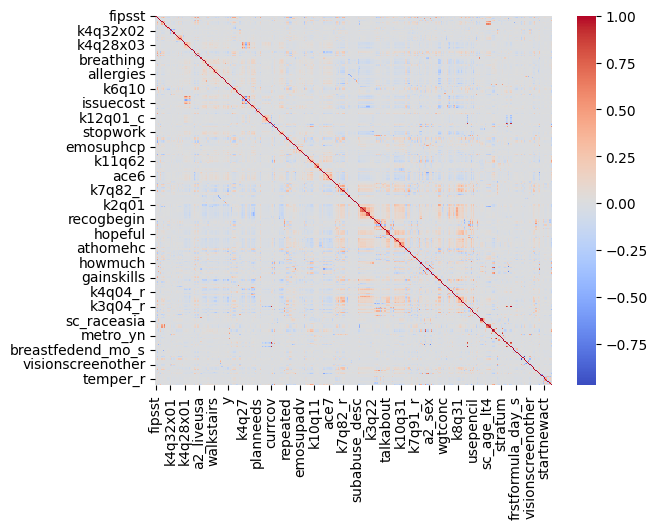

In [329]:
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

In [330]:
pca = PCA(n_components=100)
pca_result = pca.fit_transform(df)

In [331]:
print(pca.explained_variance_ratio_)

[9.98959255e-01 9.74049148e-04 2.52371424e-05 1.77884769e-05
 9.28977359e-06 2.51447896e-06 1.88568444e-06 1.72443662e-06
 9.20890881e-07 9.02353569e-07 5.95648533e-07 3.63765475e-07
 3.56927797e-07 3.14668875e-07 2.54950884e-07 2.15780897e-07
 1.81382690e-07 1.63220901e-07 1.58973552e-07 1.42067341e-07
 1.29390670e-07 1.19657621e-07 1.16415013e-07 9.63501311e-08
 9.31124916e-08 8.94592630e-08 8.48984603e-08 7.88996282e-08
 7.75201321e-08 7.18147984e-08 7.03602432e-08 6.76680212e-08
 6.33360862e-08 6.14606728e-08 5.67264596e-08 5.66530615e-08
 5.34139892e-08 5.01375913e-08 4.83802305e-08 4.69198672e-08
 4.53701333e-08 4.51075778e-08 4.25589760e-08 4.11770480e-08
 4.06683750e-08 3.79510587e-08 3.54714539e-08 3.51473268e-08
 3.47019907e-08 3.39743689e-08 3.27850246e-08 3.21345814e-08
 3.13150165e-08 3.09690208e-08 2.96291254e-08 2.72718043e-08
 2.60187002e-08 2.57310902e-08 2.49089934e-08 2.44156997e-08
 2.38664359e-08 2.33834341e-08 2.23094484e-08 2.21355425e-08
 2.18837835e-08 2.132070

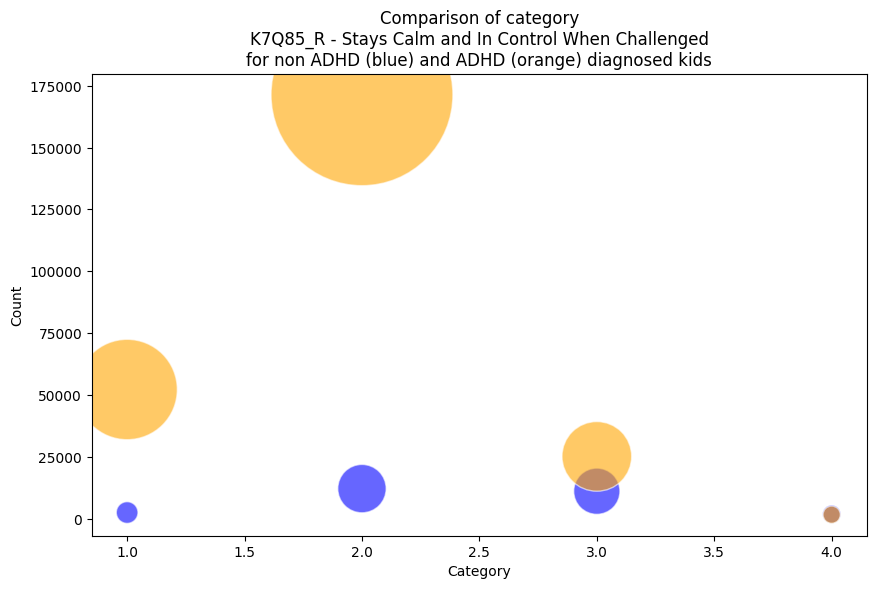

In [332]:
# Count the occurrences of each Category and Type
grouped = df.groupby(['k7q85_r','y']).size().reset_index(name='Count')

# Plot bubble chart
plt.figure(figsize=(10, 6))

# Plot each type with a different color
types = grouped['y'].unique()
colors = ['blue', 'orange']

for t, color in zip(types, colors):
    subset = grouped[grouped['y'] == t]
    plt.scatter(subset['k7q85_r'], subset['Count'],
                s=subset['Count']*0.1,  # Scale size of bubbles
                alpha=0.6, edgecolors="w", label=f'Type {t}', color=color)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Comparison of category\nK7Q85_R ‐ Stays Calm and In Control When Challenged\nfor non ADHD (blue) and ADHD (orange) diagnosed kids')
plt.legend(title="Type")
plt.legend().remove()

# Display the chart
plt.show()

In [333]:
adhd_df = df[df['y'] == 1]
noadhd_df = df[df['y'] == 2]

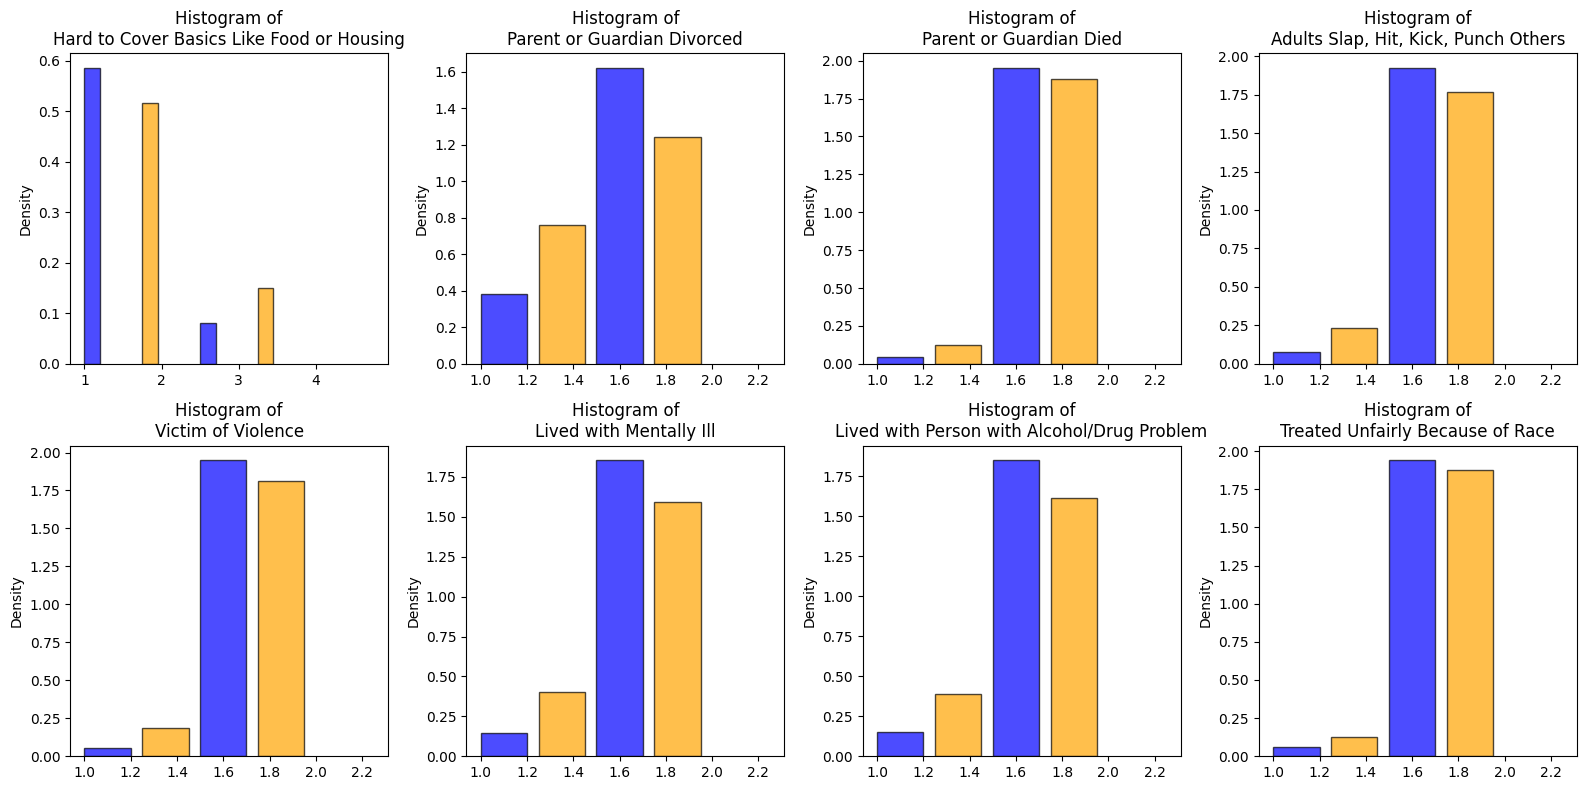

In [334]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()
columns = ['ace1', 'ace3', 'ace4', 'ace6', 'ace7', 'ace8', 'ace9', 'ace10']
columns_labels = ['Hard to Cover Basics Like Food or Housing',
                  'Parent or Guardian Divorced',
                  'Parent or Guardian Died',
                  'Adults Slap, Hit, Kick, Punch Others',
                  'Victim of Violence',
                  'Lived with Mentally Ill',
                  'Lived with Person with Alcohol/Drug Problem',
                  'Treated Unfairly Because of Race']
# Plot histograms in each subplot
for i, column in enumerate(columns):
    noadhd_df[column].plot(kind='hist', bins=2, ax=axes[i], edgecolor='black', alpha=0.7, density=True, color='blue', width=0.2)
    adhd_df[column].plot(kind='hist', bins=2, ax=axes[i], edgecolor='black', alpha=0.7, density=True, color='orange', width=0.2, align='right' )
    axes[i].set_title(f'Histogram of\n{columns_labels[i]}')
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

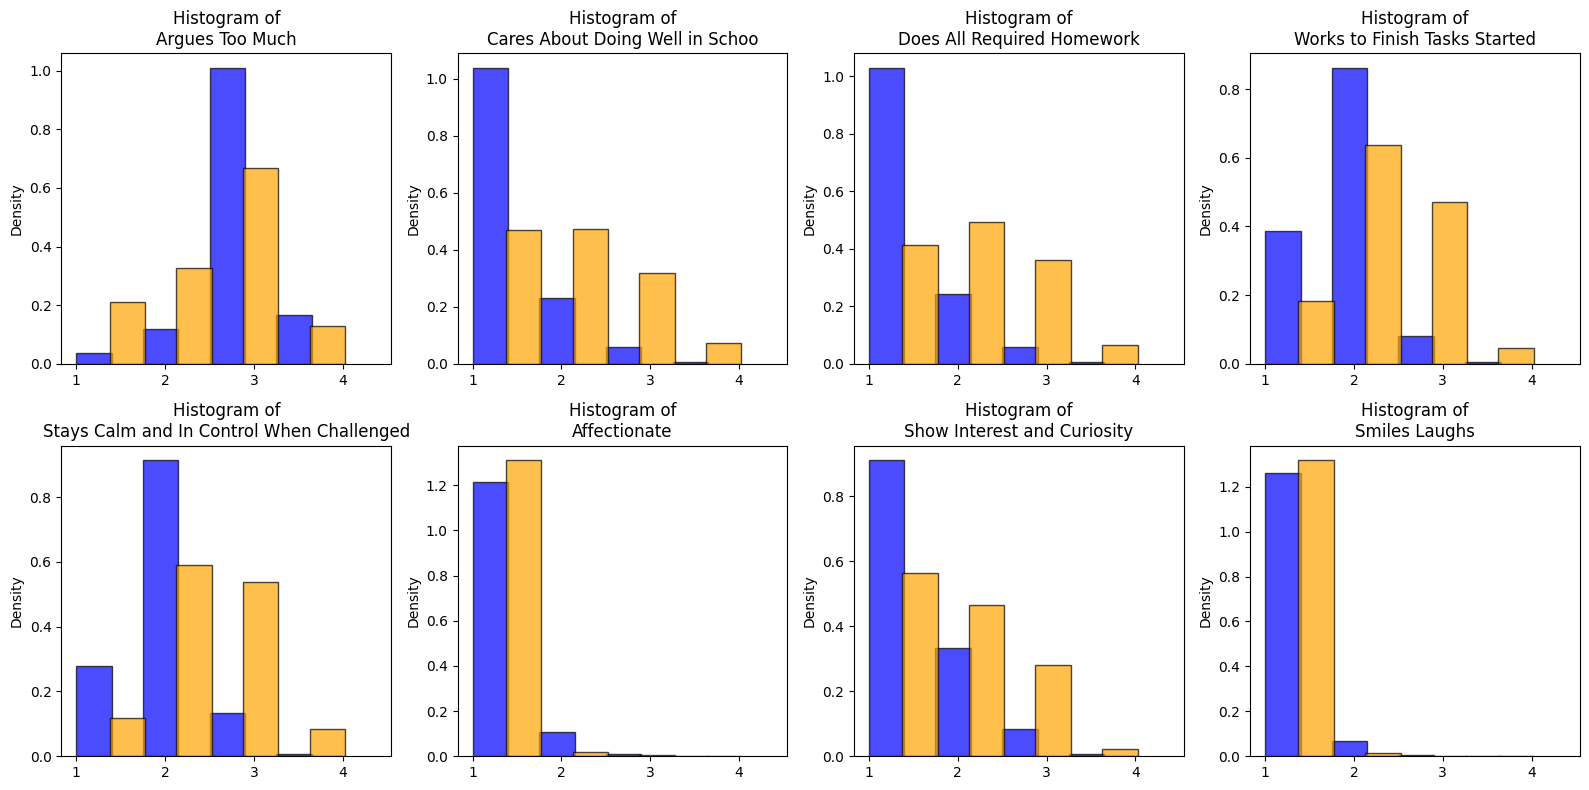

In [335]:
# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()
columns = ['k7q70_r', 'k7q82_r', 'k7q83_r', 'k7q84_r', 'k7q85_r', 'k6q70_r', 'k6q71_r', 'k6q72_r']
columns_labels = ['Argues Too Much',
                  'Cares About Doing Well in Schoo',
                  'Does All Required Homework',
                  'Works to Finish Tasks Started',
                  'Stays Calm and In Control When Challenged',
                  'Affectionate',
                  'Show Interest and Curiosity',
                  'Smiles Laughs']
# Plot histograms in each subplot
for i, column in enumerate(columns):
    noadhd_df[column].plot(kind='hist', bins=4, ax=axes[i], edgecolor='black', alpha=0.7, density=True, color='blue', width=0.4)
    adhd_df[column].plot(kind='hist', bins=4, ax=axes[i], edgecolor='black', alpha=0.7, density=True, color='orange', width=0.4, align='right' )

    axes[i].set_title(f'Histogram of\n{columns_labels[i]}')
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [336]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to normalize all columns
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [337]:
# Define the target variable and features
target = 'y'
features = df.drop(columns=[target]).select_dtypes(include=['number']).columns  # Selecting numerical features

X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the models and hyperparameters to test in the grid search
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

params = {
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [5, 10, 15]},
    'LogisticRegression': {'C': [0.01, 0.1, 1], 'solver': ['liblinear']},
    'KNN': {'n_neighbors': [3, 5, 7, 11], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5]},
    'GradientBoosting': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]}
}

# Store the results
results = []
feature_importance_results = {}

# Loop over the models and perform grid search with cross-validation
for model_name, model in models.items():
    grid = GridSearchCV(model, params[model_name], cv=5, scoring='accuracy', n_jobs=-1)

    # Measure execution time
    start_time = time.time()
    grid.fit(X_train, y_train)
    end_time = time.time()

    # Predict on the test set
    y_pred = grid.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Feature Importance or Coefficients
    if model_name in ['RandomForest', 'DecisionTree', 'GradientBoosting']:
        feature_importances = grid.best_estimator_.feature_importances_
        feature_importance_results[model_name] = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
    elif model_name == 'LogisticRegression':
        coefficients = grid.best_estimator_.coef_[0]
        feature_importance_results[model_name] = pd.DataFrame({
            'Feature': X_train.columns,
            'Coefficient': coefficients
        }).sort_values(by='Coefficient', ascending=False)
    # KNN does not provide feature importances natively, so we skip it

    # Save the results
    results.append({
        'Model': model_name,
        'BestParams': grid.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Execution Time (s)': end_time - start_time,
        'Confusion Matrix': cm
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

# Print or Display Feature Importances for models that provide them
for model_name, importance_df in feature_importance_results.items():
    print(f"\nFeature Importances for {model_name}:")
    print(importance_df)

                Model                                         BestParams  \
0        RandomForest             {'max_depth': 15, 'n_estimators': 100}   
1  LogisticRegression                  {'C': 0.1, 'solver': 'liblinear'}   
2                 KNN           {'n_neighbors': 7, 'weights': 'uniform'}   
3        DecisionTree           {'max_depth': 5, 'min_samples_split': 2}   
4    GradientBoosting  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...   

   Accuracy  Precision    Recall  F1 Score  Execution Time (s)  \
0  0.916759   0.903485  0.916759  0.897836          184.991215   
1  0.920984   0.909663  0.920984  0.910855           82.769711   
2  0.907371   0.886118  0.907371  0.877184         1282.911040   
3  0.912257   0.896317  0.912257  0.898723           41.201288   
4  0.922893   0.912925  0.922893  0.914646         2921.930661   

                Confusion Matrix  
0   [[2005, 6143], [791, 74361]]  
1  [[3077, 5071], [1511, 73641]]  
2    [[951, 7197], [519, 74633]]  
3  [[2

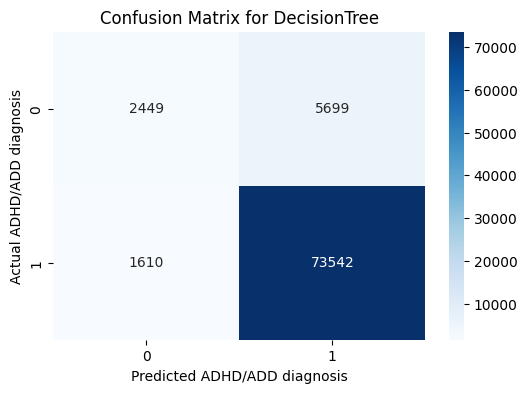

In [343]:
# 3 Decission Tree is the best model (best performance)
model_result = results[3]  #

# Extract the confusion matrix
cm = model_result['Confusion Matrix']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.ylabel('Actual ADHD/ADD diagnosis')
plt.xlabel('Predicted ADHD/ADD diagnosis')
plt.title(f"Confusion Matrix for {model_result['Model']}")

# Show the plot
plt.show()

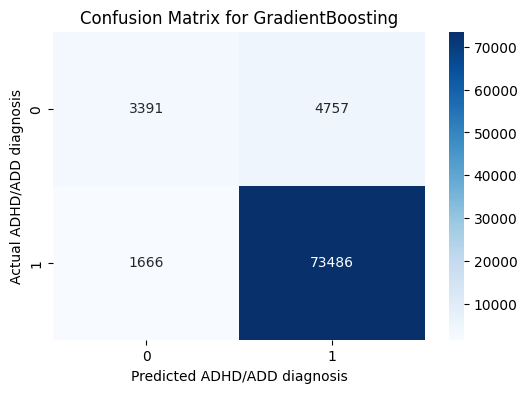

In [342]:
# 4 Gradient Boosting is the best model (best accuracy)
model_result = results[4]  #

# Extract the confusion matrix
cm = model_result['Confusion Matrix']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.ylabel('Actual ADHD/ADD diagnosis')
plt.xlabel('Predicted ADHD/ADD diagnosis')
plt.title(f"Confusion Matrix for {model_result['Model']}")

# Show the plot
plt.show()